In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels)=fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images, valid_images, train_labels,valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)

print(train_images.shape)
print(valid_images.shape)

(54000, 28, 28)
(6000, 28, 28)


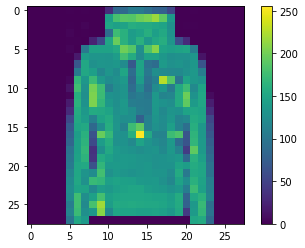

In [ ]:
#Vẽ hình ra xem thử
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Bài tập

### 1. Hãy tạo một model có cấu trúc sau và train thử:
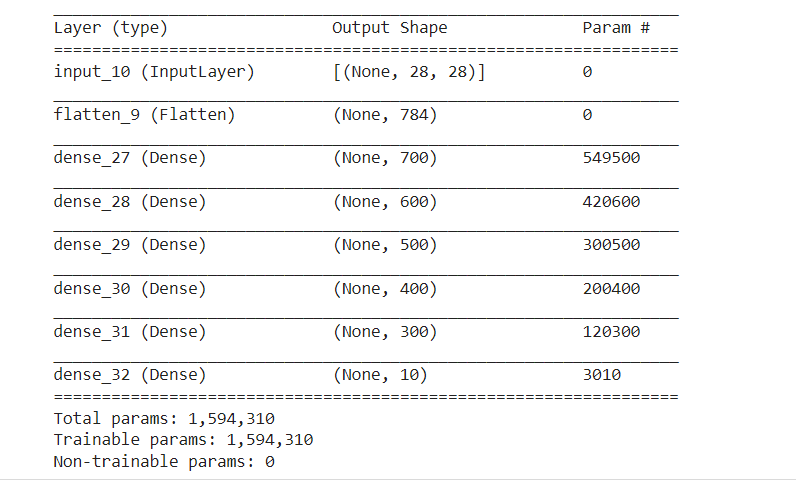

In [ ]:
input_ = Input(shape = (28,28))
x = Flatten()(input_)
hidden_units = [700,600,500,400,300]
for units in hidden_units :
  x = Dense(units = units , activation = tf.nn.relu)(x)
output_ = Dense(units = 10, activation = tf.nn.softmax)(x)

model = Model(inputs = input_, outputs = output_ )


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 700)               549500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300

In [ ]:
model.compile(
    optimizer= Adam(0.001), 
    loss=tf.keras.losses.sparse_categorical_crossentropy ,
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(x=train_images, y=train_labels,
                  epochs=20,
                  verbose=1,
                  validation_data=(valid_images,valid_labels))

Epoch 1/20
1688/1688 [==============================] - 37s 22ms/step - loss: 1.0664 - accuracy: 0.7943 - val_loss: 0.5063 - val_accuracy: 0.8170
Epoch 2/20
1688/1688 [==============================] - 36s 21ms/step - loss: 0.4448 - accuracy: 0.8422 - val_loss: 0.3980 - val_accuracy: 0.8628
Epoch 3/20
1688/1688 [==============================] - 36s 21ms/step - loss: 0.4206 - accuracy: 0.8518 - val_loss: 0.4070 - val_accuracy: 0.8500
Epoch 4/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.4005 - accuracy: 0.8600 - val_loss: 0.3897 - val_accuracy: 0.8420
Epoch 5/20
1688/1688 [==============================] - 35s 20ms/step - loss: 0.3777 - accuracy: 0.8669 - val_loss: 0.4015 - val_accuracy: 0.8472
Epoch 6/20
1688/1688 [==============================] - 36s 21ms/step - loss: 0.3609 - accuracy: 0.8730 - val_loss: 0.3824 - val_accuracy: 0.8645
Epoch 7/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3487 - accuracy: 0.8781 - val_loss: 0.3626 -

### 2. Nêu cách tính số Param

Ở hình trên, ta thấy rằng ở lớp đầu là lớp input để nhập dữ liệu vào và lớp flatten là để đập bẹp ảnh ra nên sẽ không có số parameter ở 2 lớp này. 

Ở các lớp Dense kế tiếp, 
Tiếp theo là lớp Dense ( lớp Fully-connected), ở lớp này sẽ thực hiện phép tính :
$$ g^{[l]}(W^{[l]} X^{[l - 1]} + b^{[l]}) $$
trong đó $g^{[l]}$ là activation function ở lớp thứ $l$, $X^{[l - 1]}$ là Input đầu vào cho lớp $l$ này , $W^{[l]}$ và $b^{[l]}$ là các tham số Weight và bias ở lớp thứ $l$.

Sau khi đập bẹp (flatten) ảnh ra ở lớp thứ $l - 1$, giả sử kích thước của ảnh hiện tại là $(n^{[l - 1]},1)$. Khi đó để đi qua các lớp FC tiếp theo (lớp $l$) với $n^{[l]}$ neurons thì $W$ và $b$ phải có kích thước là :
\begin{align*}
 W &: (n^{[l]}, n^{[l - 1]}) \\
 b &: (n^{[l]}, 1)
\end{align*}
Như vậy số param # cần có ở lớp thứ $l$ là :
$$   n^{[l]}* n^{[l-1]} + n^{[l]}         $$ 

Như vậy ta có số param # ở lớp thứ 3 (dense) trong hình trên là : $ 700*784 + 700 = 549 500$, ở lớp thứ 4 (dense_1) là $700*600 + 600 = 420600 $, ở lớp thứ 5 (dense_2) là $600*500 + 500 = 300500 $, ở lớp thứ 6 (dense_3) là $500*400 + 400 = 200400 $, ở lớp thứ 7 (dense_4) là $400*300 + 300 = 120300 $. Và ở lớp cuối cùng là  $300*10 + 10 = 3010 $

### 3. Tính độ chính xác trên tập test

In [ ]:
evaluation=model.evaluate(test_images, test_labels)
print("Model có độ chính xác là {} và loss là {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 2s 6ms/step - loss: 0.3822 - accuracy: 0.8873
Model có độ chính xác là 0.8873000144958496 và loss là 0.3822433054447174
